# Zillow Neighborhood Dataset Analysis 



- It is strongly recommended you use the standard `pd`, `np`, `plt` and `sns` namespaces for these popular libraries


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load the Zillow dataset

In [2]:
df = pd.read_csv("../data/Neighborhood_Zhvi_AllHomes.csv")
df.tail(3)

RegionID      RegionName              City State  \
7465    763039  Little Tuscany      Palm Springs    CA   
7466    763095   North Village  New Smyrna Beach    FL   
7467    763848       Woodhaven             Fargo    ND   

                                   Metro        CountyName  SizeRank  \
7465    Riverside-San Bernardino-Ontario  Riverside County      7466   
7466  Deltona-Daytona Beach-Ormond Beach    Volusia County      7467   
7467                               Fargo       Cass County      7468   

       1996-04   1996-05   1996-06  ...  2018-10  2018-11  2018-12  2019-01  \
7465  128900.0  129300.0  129600.0  ...   699300   699200   704300   707400   
7466  105400.0  104600.0  103800.0  ...   308800   310900   313300   316400   
7467       NaN       NaN       NaN  ...   332400   330800   328600   327700   

      2019-02  2019-03  2019-04  2019-05  2019-06  2019-07  
7465   700300   689700   686300   685000   686700   693700  
7466   319800   321900   322400   322000   321600   320700  
7467   328100   326900   323100   320800   320500   320100  

[3 rows x 287 columns]

## How much are homes selling for in this dataset? 

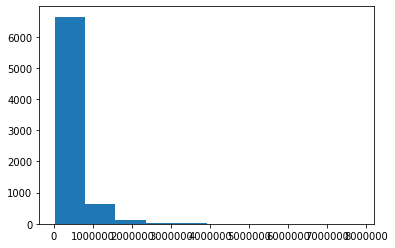

In [3]:
plt.hist(df["2019-07"]);

Yuck, that's a lot of overplotting. Let's fix it by rotating the ticks on the x-axis. 

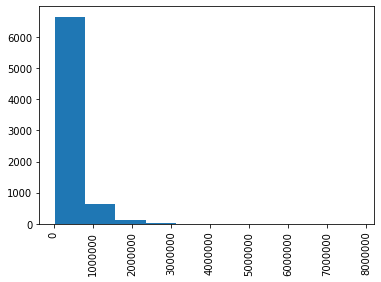

In [4]:
plt.hist(df["2019-07"]);
plt.xticks(rotation = 90);

The distribution of prices seems heavily skewed. 

How can we mitigate this so we can see the spread of the data better?

The log-transform is our friend for such heavily skewed distributions. 

(Aside: why?) 

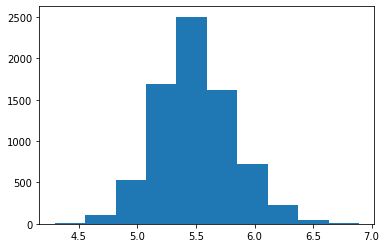

In [5]:
plt.hist(np.log10(df["2019-07"]));

It would be nice to compare how prices today compare to, say, 10 years ago. 

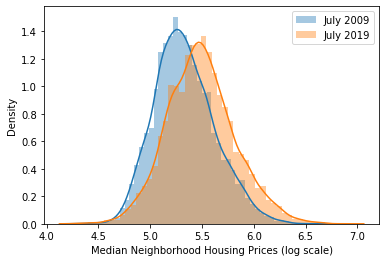

In [6]:
sns.distplot(np.log10(df["2009-07"].dropna()), label ="July 2009");
sns.distplot(np.log10(df["2019-07"]), label = "July 2019");
plt.xlabel("Median Neighborhood Housing Prices (log scale)")
plt.ylabel("Density");
plt.legend();


## San Diego Analysis

Let's focus on understanding price changes in San Diego over time.

### Tidy Data
- Each variable you measure should be in one column.
- Each different observation of that variable should be in a different row.


In [7]:
df.shape

(7468, 287)

- Our data is not tidy! 
Each price for each year is a different observation so should be in different row!

- `pd.melt` reshapes our data into the tidy format

In [8]:
df_m = pd.melt(df, id_vars=['RegionID', 'RegionName', 'City', 'State', 
                            'Metro', 'CountyName','SizeRank'])

df_m.shape

(2091040, 9)

In [9]:
df_m.sample(3)

RegionID       RegionName        City State  \
1348336    276214      Blenman-Elm      Tucson    AZ   
65931      275876    Village Woods  Fort Wayne    IN   
1327802    761985  Jupiter Village     Jupiter    FL   

                                         Metro         CountyName  SizeRank  \
1348336                                 Tucson        Pima County      4097   
65931                               Fort Wayne       Allen County      6188   
1327802  Miami-Fort Lauderdale-West Palm Beach  Palm Beach County      5967   

        variable     value  
1348336  2011-04  190300.0  
65931    1996-12   53900.0  
1327802  2011-01  115900.0

In [10]:
df_sd = df_m[df_m.CountyName == 'San Diego County']

df_sd.sample(4)

RegionID     RegionName       City State               Metro  \
1177699    118387  Sunset Cliffs  San Diego    CA  San Diego-Carlsbad   
950345     764287  La Costa Oaks   Carlsbad    CA  San Diego-Carlsbad   
600221     118211     South Park  San Diego    CA  San Diego-Carlsbad   
1965476    268258   Lincoln Park  San Diego    CA  San Diego-Carlsbad   

               CountyName  SizeRank variable      value  
1177699  San Diego County      5224  2009-05  1035700.0  
950345   San Diego County      1910  2006-11   898700.0  
600221   San Diego County      2782  2002-12   377800.0  
1965476  San Diego County      1393  2018-03   439900.0

Lets explore how the median price of homes in each region has changed over time. 

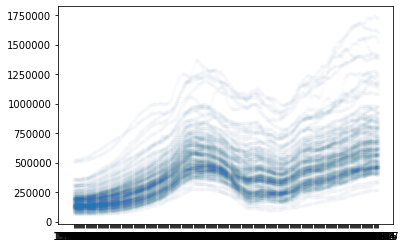

In [11]:
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

- We get a good idea of the trends but over-plotting on the x-ticks makes it impossible to read. 

- We need to reduce the resolution of the x-ticks. 

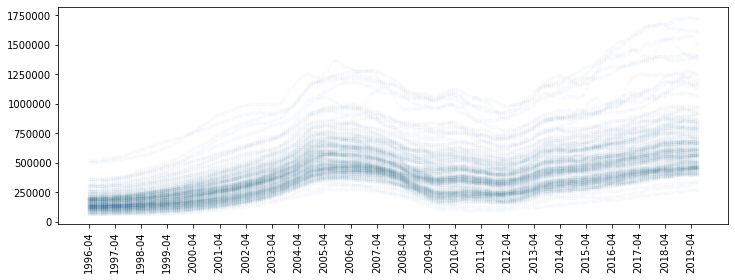

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);

# create the text to use for labels for every 12 months
labels = []
pos = []
for i, item in enumerate(pd.unique(df_sd.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item)

plt.xticks(pos, labels, rotation = 90);


This chart looks much better and shows the how prices or different regions are changing over time. It would be nice to know how a *specific* neighborhood's prices change. 

Let's get the list of all region names available to us in San Diego. 

In [13]:
region_names = list(pd.unique(df_sd.RegionName))
region_names[0]

'Southwest'

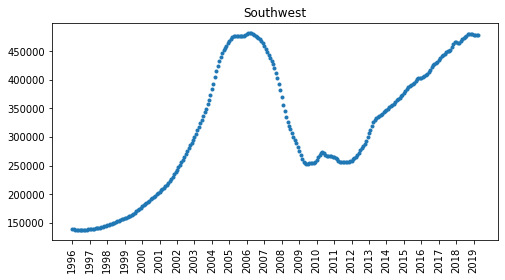

In [14]:
plt.figure(figsize=(8,4))
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_region.variable, df_region.value, '.')
labels = []
pos = []
for i, item in enumerate(pd.unique(df_region.variable)):
    if i % 12 ==0:
        pos.append(i)
        labels.append(item.split("-")[0])      
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

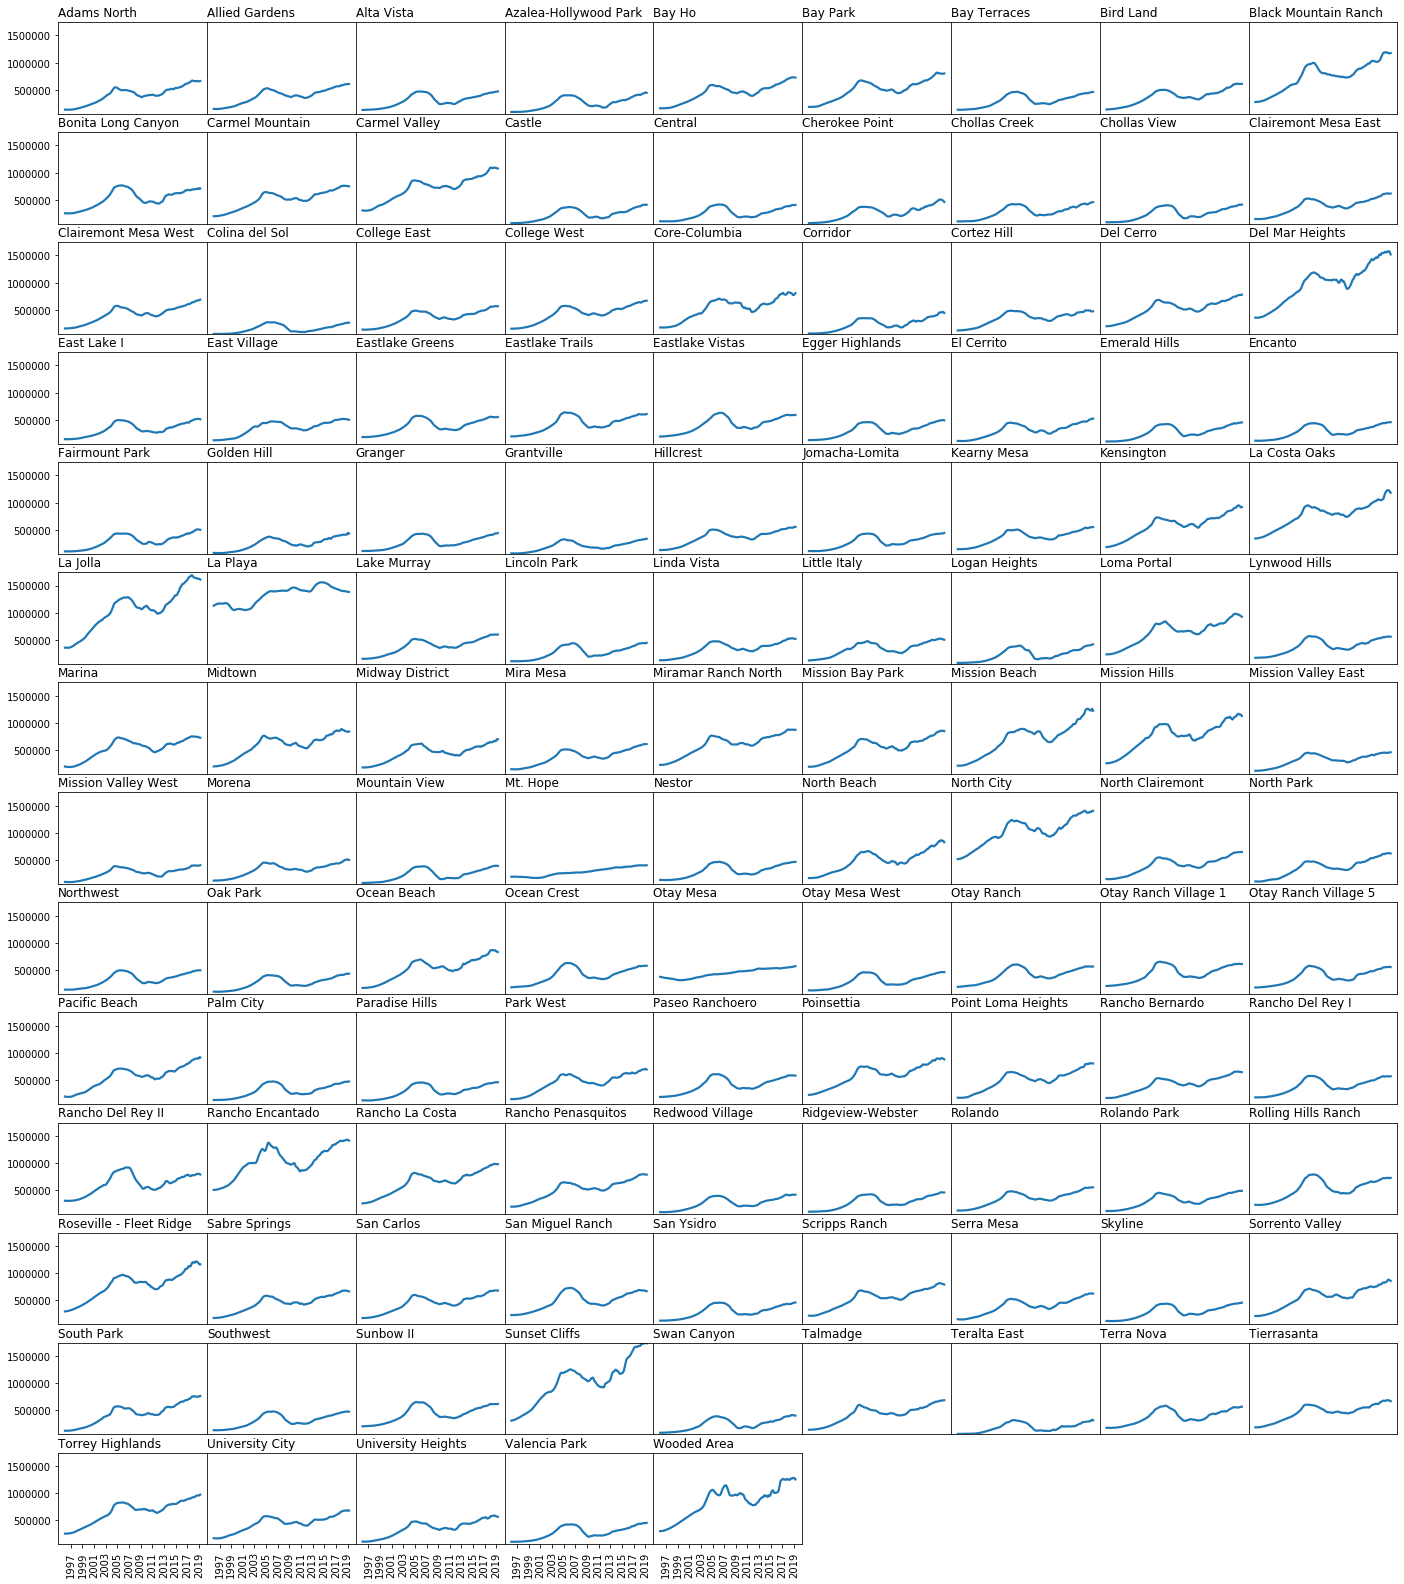

In [15]:
plt.figure(figsize = (24,28))
num_cols_in_subplot = 9
for i, region_name in enumerate(sorted(region_names)):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             label = region_name)
    # make sure the vertical axis of each sub-plot has the same scale
    plt.ylim([np.min(df_sd.value), np.max(df_sd.value)])
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

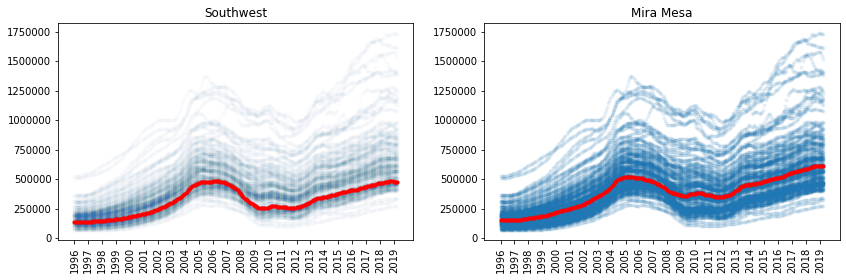

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



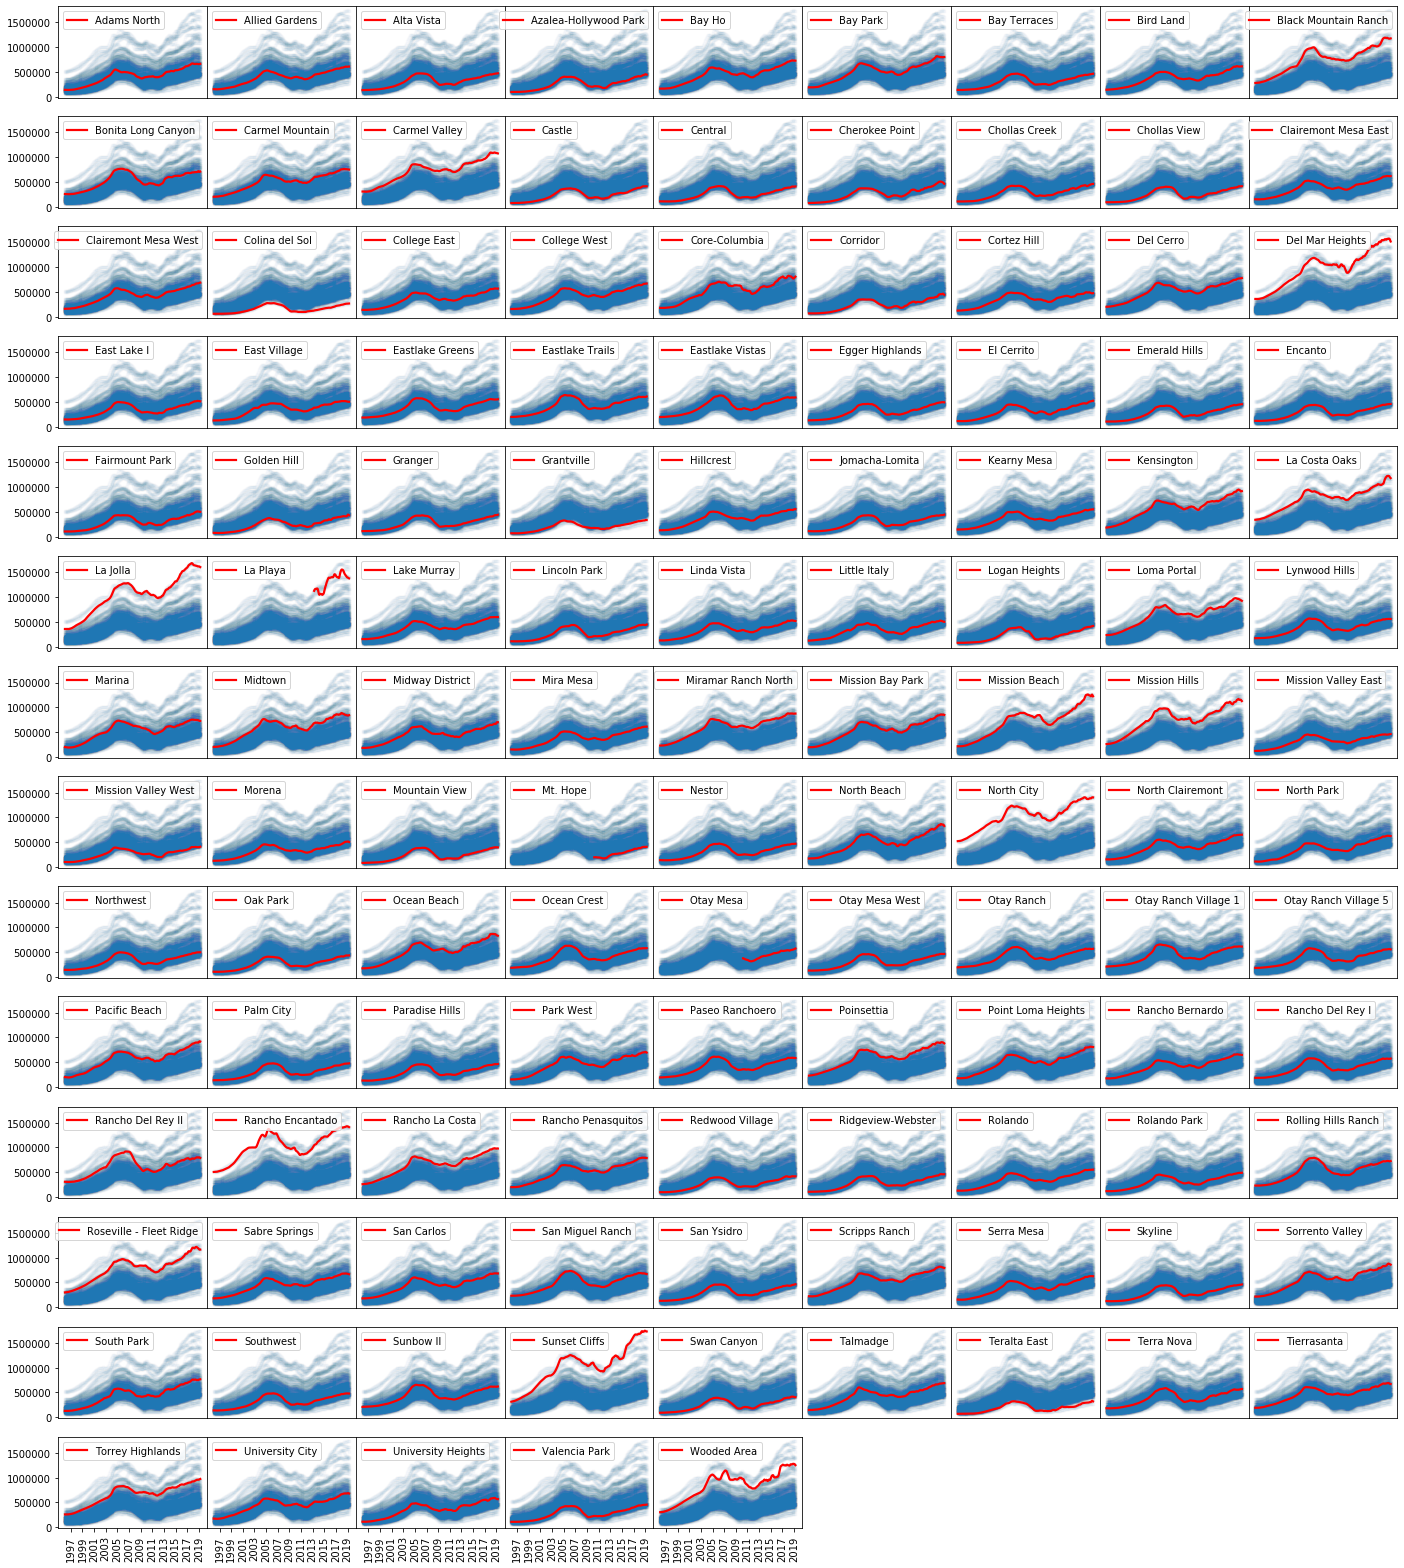

In [17]:
plt.figure(figsize = (24,28))

num_cols_in_subplot = 9

for i, region_name in enumerate(sorted(region_names)):
    plt.subplot(len(region_names)//num_cols_in_subplot+1, num_cols_in_subplot, 
                i+1)
    # plot all the regions but very lightly small alpha
    plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
    # subset the data to just a specific region 
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, linewidth = 2.2, 
             color = "red", label = region_name)
    
    # only plot the y ticks that apppear on left
    if i%num_cols_in_subplot != 0: # if i%num_cols_in_subplot == 0:
        plt.yticks([])
    
    # only plot the x ticks that apppear on bottom
    if i < (len(region_names)//num_cols_in_subplot)*(num_cols_in_subplot):
        plt.xticks([]);  
    else:
        # lets just plot ticks for every other year
        # starting from an odd year
        plt.xticks(pos[1::2], labels[1::2], rotation = 90);
    
    #plt.title(region_name, loc = "left")
    plt.legend()
    # plt.legend(loc = 'upper left')
    plt.subplots_adjust(wspace=0, hspace=.2)

### Bubble Analysis

- The peak of the bubble occurred around 2005. 
- Instead of looking at prices at all time points in the data, lets compare prices at the height of the bubble with today. 
- We pick July 2005 as the "height" to correspond with the 14 years prior to the latest observations we have. 

In [18]:
df_latest = df_sd[df_sd.variable == df_sd.variable.max()]
df_bubble = df_sd[df_sd.variable == '2005-07']
df_change = pd.concat([df_bubble, df_latest], ignore_index=True)

df_change.sample(5)

RegionID         RegionName         City State               Metro  \
131    403253     Otay Mesa West    San Diego    CA  San Diego-Carlsbad   
121    416906   San Miguel Ranch  Chula Vista    CA  San Diego-Carlsbad   
197    276640  Ridgeview-Webster    San Diego    CA  San Diego-Carlsbad   
201    403231        Adams North    San Diego    CA  San Diego-Carlsbad   
69     274698         North City    San Diego    CA  San Diego-Carlsbad   

           CountyName  SizeRank variable      value  
131  San Diego County       313  2019-07   466700.0  
121  San Diego County      7013  2005-07   713700.0  
197  San Diego County      2242  2019-07   462000.0  
201  San Diego County      2463  2019-07   665600.0  
69   San Diego County      2000  2005-07  1236100.0

## Slope Graphs

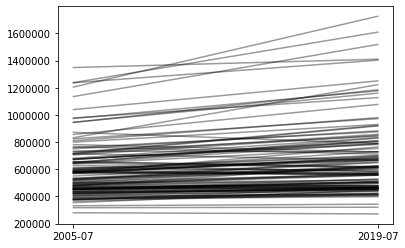

In [19]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)


We have too much over-plotting! 

Over-plotting solution: only plot the regions that have "large" changes. Might be also interesting to look at regions that went "negative" (have yet to recover from the crash). 

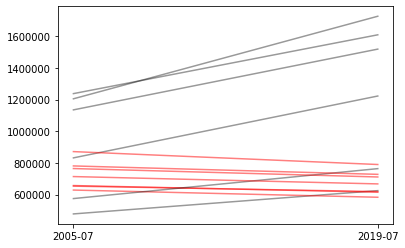

In [20]:
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        plt.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
    elif (change < 0) & (percent_change < -5):
        plt.plot(df_region.variable, df_region.value, color = "r", alpha = .5)

Which neighborhoods are the biggest movers? Which neighborhoods did not recover?

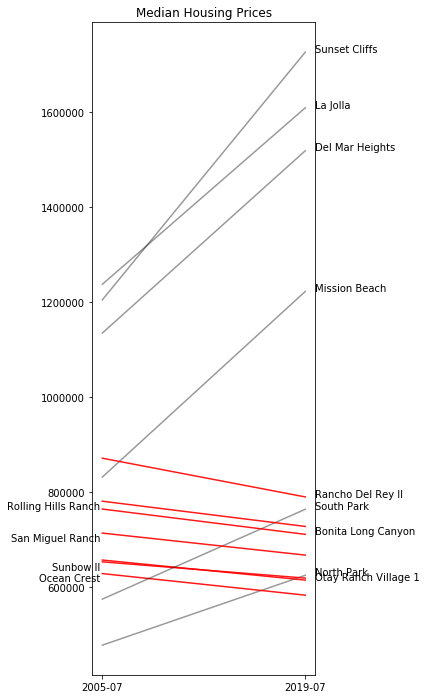

In [21]:
fig, ax = plt.subplots(figsize=(4, 12))
count = 0
for i, region_name in enumerate(region_names):
    df_region = df_change[df_change.RegionName == region_name]
    change = df_region.iloc[1,:]["value"] - df_region.iloc[0,:]["value"]
    percent_change = 100*change/df_region.iloc[0,:]["value"]
    if (change > 0) & (percent_change > 30):
        ax.plot(df_region.variable, df_region.value, color = "k", alpha = .4)
        ax.text(1.05, df_region.value.iloc[1], region_name)

    elif (change < 0) & (percent_change < -5):        
        ax.plot(df_region.variable, df_region.value, color = "r", alpha = .9)
        if count%2 == 0:
            ax.text(-.01, df_region.value.iloc[0], region_name, 
                    horizontalalignment = "right", verticalalignment = "top")
        else:
            ax.text(1.05, df_region.value.iloc[1], region_name,)
        count += 1

plt.title("Median Housing Prices");       

Percent change is often much more interesting. 

In [22]:
# undo a pivot
df_sd_change = df_change.pivot(index = 'RegionName', columns = "variable", 
                               values = 'value')

df_sd_change.reset_index(inplace=True)

df_sd_change.head()

variable             RegionName   2005-07   2019-07
0                   Adams North  521400.0  665600.0
1                Allied Gardens  532400.0  610800.0
2                    Alta Vista  470400.0  475500.0
3         Azalea-Hollywood Park  405000.0  449500.0
4                        Bay Ho  586400.0  729400.0

We will create a new variable `percent_change` that has the percent change between the latest entry in our data with the "peak" bubble.

In [23]:
df_sd_change["percent_change"] = 100*(df_sd_change["2019-07"] - 
                                      df_sd_change["2005-07"])/df_sd_change["2005-07"]

In [24]:
df_sd_change.describe()

variable       2005-07       2019-07  percent_change
count     1.190000e+02  1.220000e+02      119.000000
mean      5.924866e+05  6.736910e+05       11.945084
std       2.045908e+05  2.775732e+05       11.195909
min       2.795000e+05  2.709000e+05       -9.353839
25%       4.530000e+05  4.676750e+05        2.862120
50%       5.500000e+05  5.999000e+05       12.502786
75%       6.731000e+05  7.863250e+05       19.266438
max       1.348300e+06  1.725800e+06       46.952026

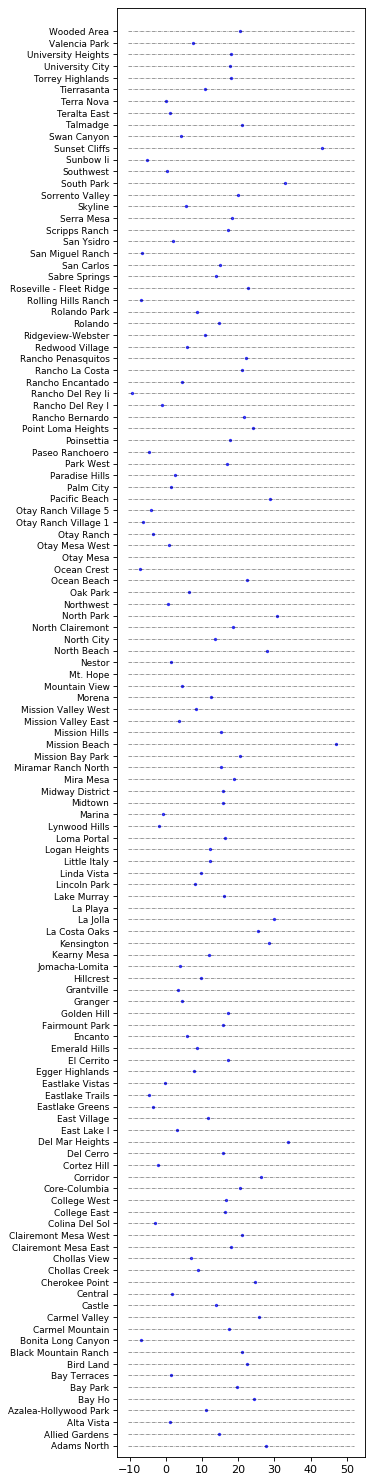

In [25]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);


ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});
ax.set_ylim(-1, 123);

Alphabetically showing data is almost never useful. It is much more informative to display in *quantitative* sort

In [26]:
df_sd_change.sort_values(["percent_change"], inplace=True)

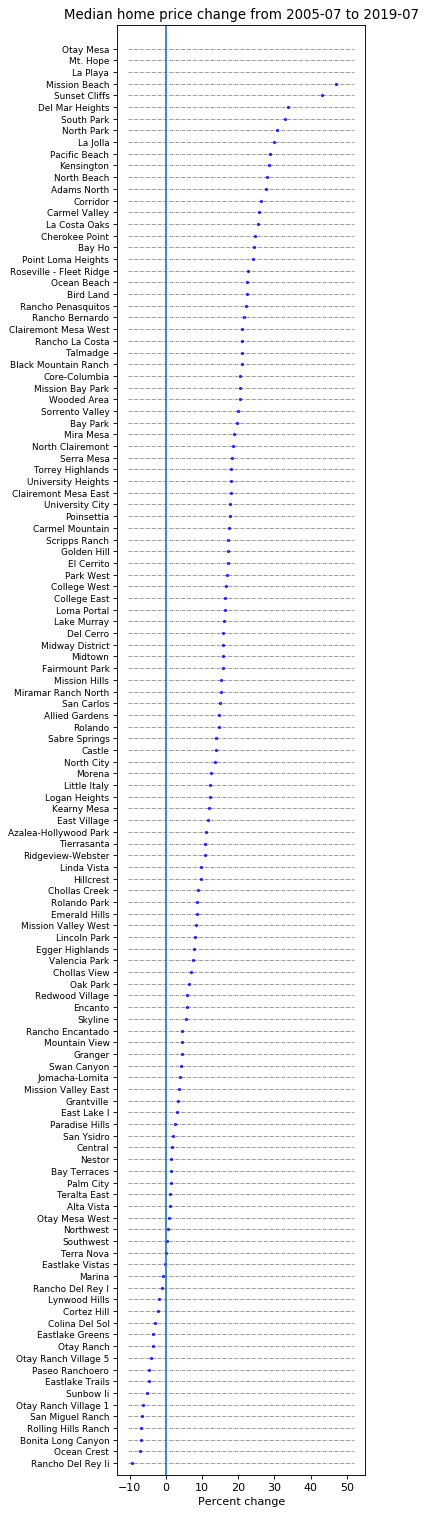

In [27]:
fig, ax = plt.subplots(figsize=(4,24), dpi= 80)
ax.hlines(y=np.arange(df_sd_change.shape[0]), alpha=0.7, 
          xmin=np.min(df_sd_change.percent_change) -1, 
          xmax=np.max(df_sd_change.percent_change) + 5, 
          linewidth=.5, linestyles='dashdot')
ax.scatter(y=np.arange(df_sd_change.shape[0]), 
           x=df_sd_change.percent_change, color='blue',s = 4, 
           alpha=0.7);

ax.set_title('Median home price change from 2005-07 to 2019-07', 
             fontdict={'size':12})
ax.set_xlabel('Percent change')
ax.set_yticks(np.arange(df_sd_change.shape[0]))
ax.set_yticklabels(df_sd_change.RegionName.str.title(), 
                   fontdict={'horizontalalignment': 'right',
                             'size': 8});
ax.axvline(0)
ax.set_ylim(-1, 123);

## Price changes

In [28]:
df_sd = df_sd.reset_index(drop=True)
monthly_change = df_sd.groupby("RegionName")["value"].apply(lambda x: 
                                                 100*x.diff()/np.hstack((1,x[:-1])))

df_sd["monthly_change"] = monthly_change
df_sd.head()

RegionID          RegionName         City State               Metro  \
0    343228           Southwest  Chula Vista    CA  San Diego-Carlsbad   
1    116625           Mira Mesa    San Diego    CA  San Diego-Carlsbad   
2    343244           Northwest  Chula Vista    CA  San Diego-Carlsbad   
3    118673     University City    San Diego    CA  San Diego-Carlsbad   
4    117557  Rancho Penasquitos    San Diego    CA  San Diego-Carlsbad   

         CountyName  SizeRank variable     value  monthly_change  
0  San Diego County        85  1996-04  139400.0             NaN  
1  San Diego County        87  1996-04  153900.0             NaN  
2  San Diego County       160  1996-04  147600.0             NaN  
3  San Diego County       171  1996-04  175700.0             NaN  
4  San Diego County       177  1996-04  202400.0             NaN

In [29]:
df_sd.tail()

RegionID         RegionName         City State               Metro  \
34155    343234    Eastlake Vistas  Chula Vista    CA  San Diego-Carlsbad   
34156    343251  Rancho Del Rey II  Chula Vista    CA  San Diego-Carlsbad   
34157    343233    Eastlake Trails  Chula Vista    CA  San Diego-Carlsbad   
34158    403248   Rancho Encantado    San Diego    CA  San Diego-Carlsbad   
34159    416906   San Miguel Ranch  Chula Vista    CA  San Diego-Carlsbad   

             CountyName  SizeRank variable      value  monthly_change  
34155  San Diego County      5856  2019-07   595700.0        0.421443  
34156  San Diego County      6164  2019-07   789800.0       -0.791358  
34157  San Diego County      6553  2019-07   612900.0        0.228945  
34158  San Diego County      6889  2019-07  1409600.0       -0.536269  
34159  San Diego County      7013  2019-07   667400.0       -0.373190

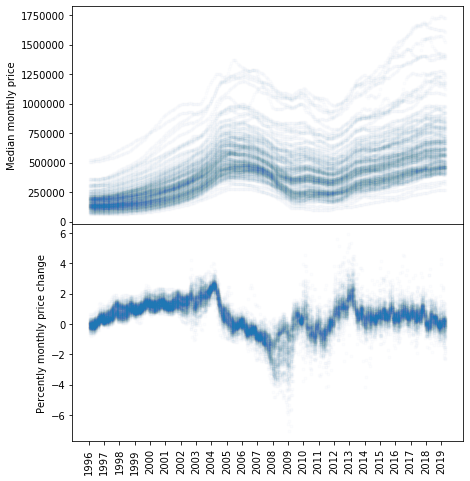

In [30]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .01);
plt.ylabel("Median monthly price");
plt.xticks([])
plt.subplot(2,1,2)
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Percently monthly price change")
plt.subplots_adjust(wspace=0, hspace=0)

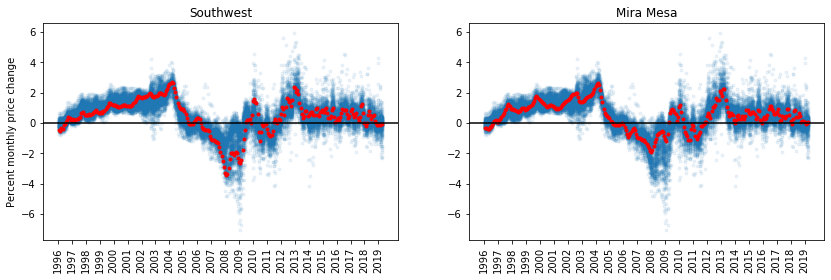

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.axhline(0, color = "k")
plt.ylabel("Percent monthly price change")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .08);
plt.plot(df_region.variable, df_region.monthly_change, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.axhline(0, color = "k");
plt.title(region_names[1]);



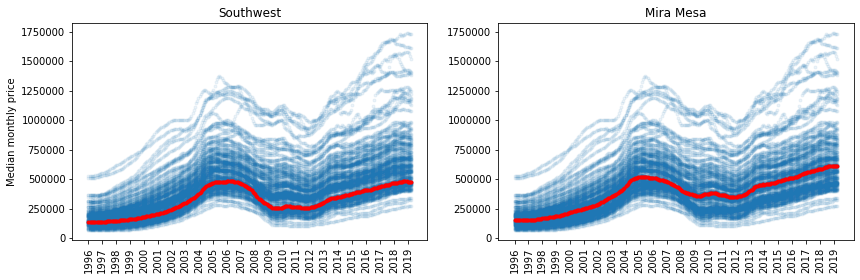

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df_region = df_sd[df_sd.RegionName == region_names[0]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.ylabel("Median monthly price")
plt.title(region_names[0]);

plt.subplot(1,2,2)
df_region = df_sd[df_sd.RegionName == region_names[1]]
plt.plot(df_sd.variable, df_sd.value, '.', alpha = .08);
plt.plot(df_region.variable, df_region.value, '.', color = "red")
plt.xticks(pos, labels, rotation = 90);
plt.title(region_names[1]);



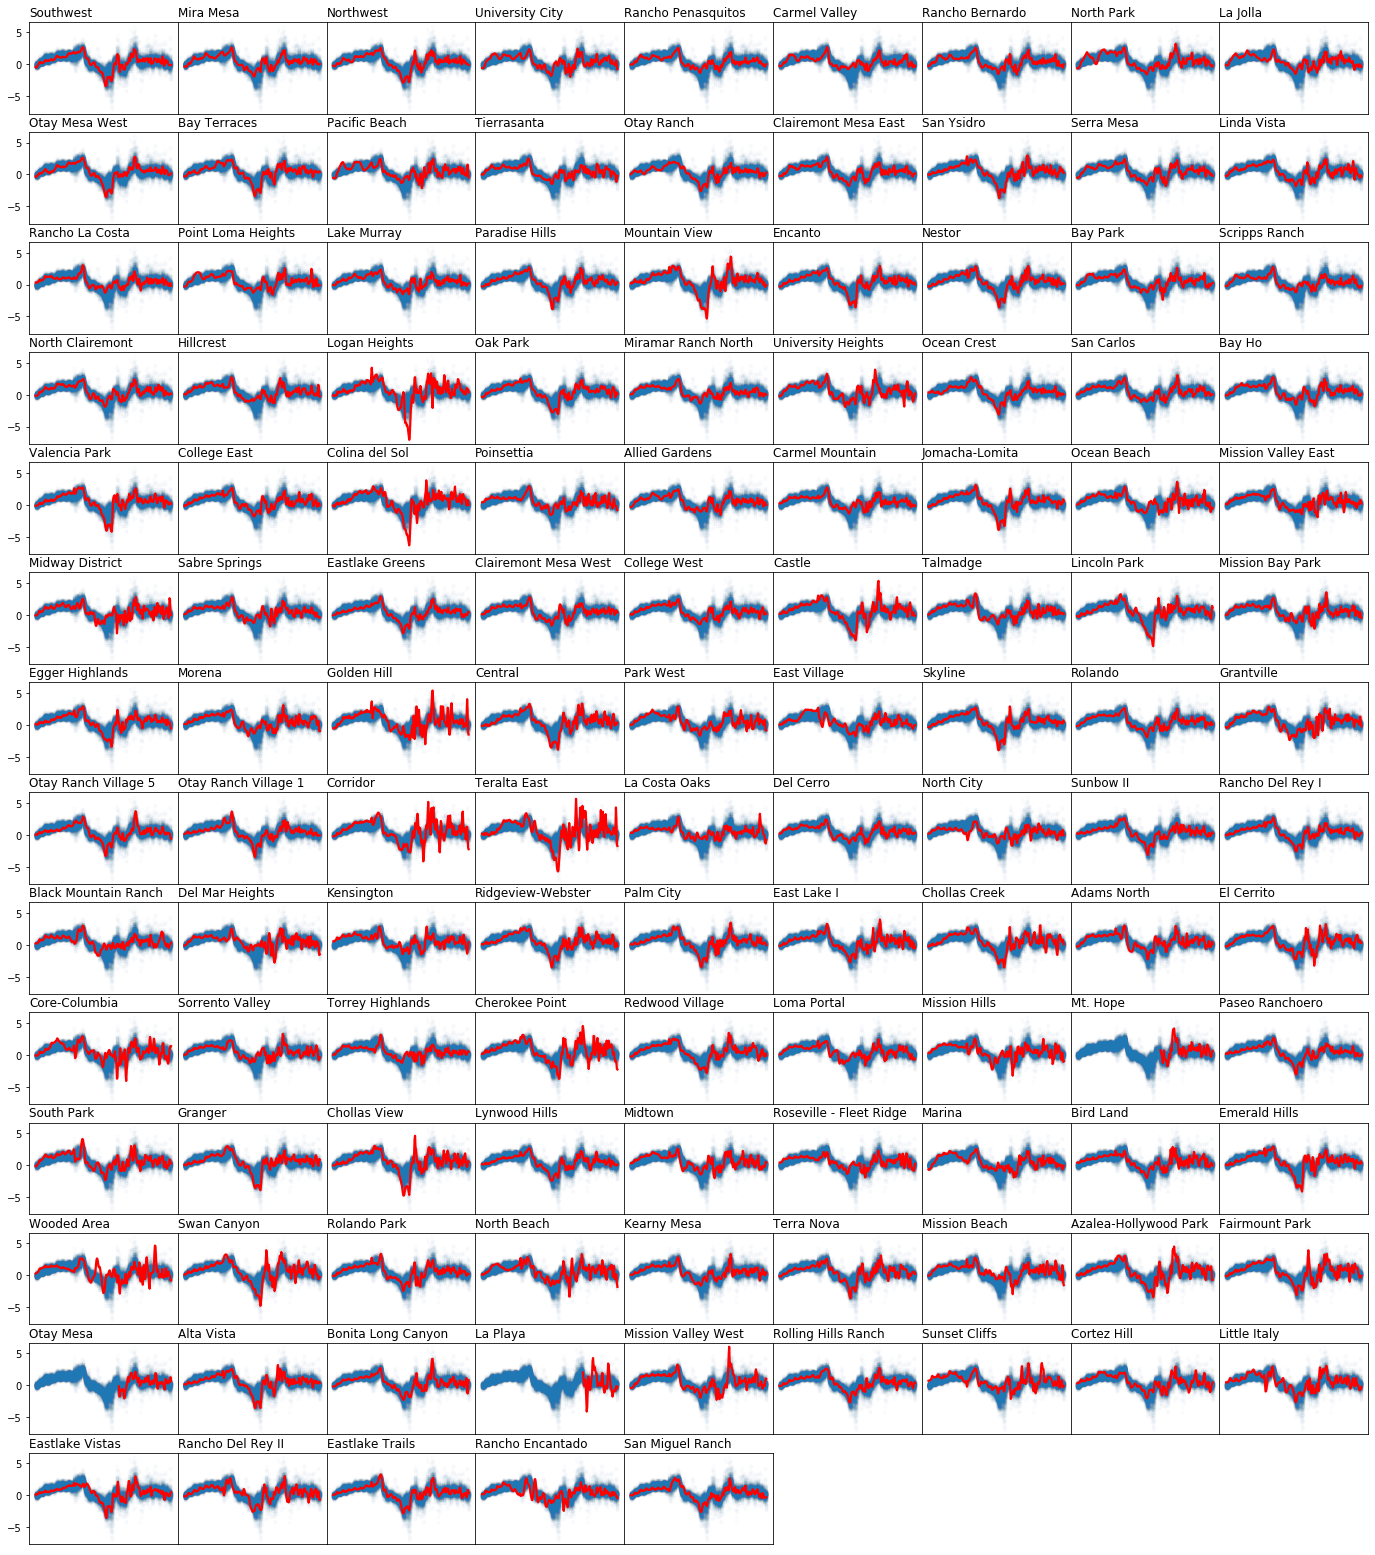

In [33]:
plt.figure(figsize = (24,28))
for i, region_name in enumerate(region_names):
    plt.subplot(14, 9, i+1)
    
    plt.plot(df_sd.variable, df_sd.monthly_change, '.', alpha = .01);
    plt.xticks([]);
    df_region = df_sd[df_sd.RegionName == region_name]
    plt.plot(df_region.variable, df_region.monthly_change, linewidth = 2.2, 
             color = "r", label = region_name)

    plt.xticks([]);
    if i%9 != 0:
        plt.yticks([])
    
    plt.title(region_name, loc = "left")
    plt.subplots_adjust(wspace=0, hspace=.2)

Let's compare the distribution of percent changes between two different states: early bubble state and present state we are at in the Real Estate market. 

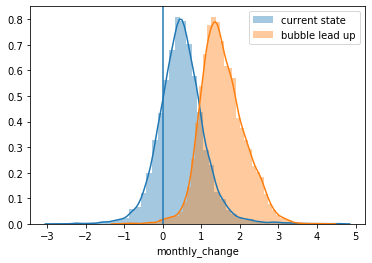

In [34]:
df_bubble_leadup = df_sd[(df_sd.variable>="2000-01") & (df_sd.variable<"2005-01")]

df_current_state = df_sd[(df_sd.variable>"2014-07") & (df_sd.variable<="2019-07")]

sns.distplot(df_current_state["monthly_change"].dropna(), label = "current state")
sns.distplot(df_bubble_leadup["monthly_change"].dropna(), label = "bubble lead up")
plt.axvline(0)
plt.legend();

Are the differences between the current state and the bubble state the same or different? Let's estimate some $p$-values for this.

In [35]:
from scipy import stats

In [36]:
p_vals = []
median_diffs = []
for region in region_names:
    df_bubble_leadup_region = df_bubble_leadup[df_bubble_leadup.RegionName == region].dropna()
    df_current_state_region = df_current_state[df_current_state.RegionName == region].dropna()
    if (df_bubble_leadup_region.shape[0] == 0) or (df_current_state_region.shape[0]==0):
        continue
    _, p_val = stats.ttest_ind(df_bubble_leadup_region.monthly_change, 
                               df_current_state_region.monthly_change)
    p_vals.append(p_val)
    
    median_diffs.append(np.median(np.abs(df_current_state_region.monthly_change)) - 
                        np.median(np.abs(df_bubble_leadup_region.monthly_change)))

## Volcano Plot


Volcano plots show us the relationship between the effect size and the statistical significance. The higher the effect size (more positive or more negative) and the higher on the graph (lower p-value) then the lesser chance of having False Positives. 

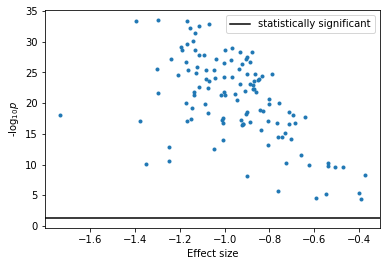

In [37]:

plt.plot(median_diffs, -np.log10(p_vals), '.');
plt.axhline(-np.log10(.05), label = "statistically significant", color = "k")
plt.legend();
plt.xlabel("Effect size")
plt.ylabel("-log$_{10}p$");

## Box Plot


To be even more convincing, let's look at the distribution of price changes during the bubble and currently. 

In [38]:
df_bubble_leadup["state"] = "bubble"
df_current_state["state"] = "current"


df_box_plot = pd.concat([df_bubble_leadup, df_current_state], axis = 0)

<ipython-input-38-9ef120534405>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bubble_leadup["state"] = "bubble"
<ipython-input-38-9ef120534405>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current_state["state"] = "current"


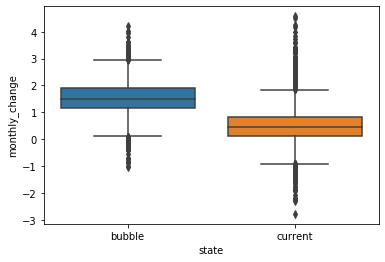

In [39]:

ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot)


The box plot summarizes the data effectively, but the raw data is hidden. It would be nice to see some of the actual data itself. 

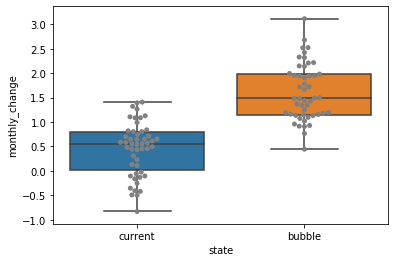

In [40]:
np.random.seed(100)
ax = sns.boxplot(x='state', y='monthly_change', data=df_box_plot.sample(100))
np.random.seed(100)
ax = sns.swarmplot(x='state', y='monthly_change', data=df_box_plot.sample(100), color="grey")
